In [ ]:
#using Isolation Forest algorithm (unsupervised learning models)
# we are doing anomaly detection on car data saved in data.csv file
# Mainly anomaly is detected on these features :
#[Engine HP, Engine Cylinders, Number of Doors, Highway MPG, city mpg,MSRP]

In [ ]:
#important modules are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from joblib import dump

In [ ]:
#----------------------
#Load & Clean Dataset
#-----------------------
df = pd.read_csv("data.csv")
features = ['Engine HP','Engine Cylinders','Number of Doors','highway MPG','city mpg','MSRP']
df_clean = df[features].dropna().reset_index(drop = True)


In [ ]:
#-----------------------------
#Simulates Ground Truth Tables
#-----------------------------
# Let's assume 2% of random data points are true anomalies (just for demo)
np.random.seed(42)
df_clean['true_label'] = 0 #0 = normal
anomaly_indices = np.random.choice(df_clean.index, size = int(0.02*len(df_clean)),replace = False)
df_clean.loc[anomaly_indices,'true_label'] = 1 #1=anomaly

In [ ]:
# Feature Scaling
#-----------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[features])

In [ ]:
#Train isolation forest
#----------------------
iso_model = IsolationForest(n_estimators = 100,contamination = 0.05,random_state =42)
df_clean['pred_label'] = iso_model.fit_predict(X_scaled)
df_clean['pred_label'] = df_clean['pred_label'].map({1:0,-1:1}) # 0 for normal & 1 for anomaly


Confusion Matrix
[[11007   572]
 [  223    13]]


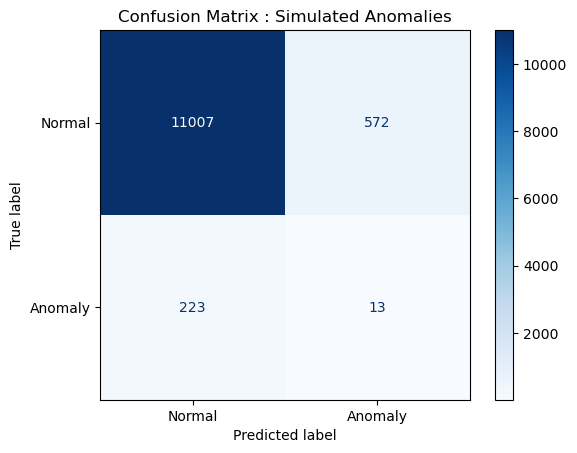

In [ ]:
#Evaluation : Confusion Matrix
#+++++++++++++++++++++++++++++
cm = confusion_matrix(df_clean['true_label'],df_clean['pred_label'])
print("Confusion Matrix")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Normal","Anomaly"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix : Simulated Anomalies")
plt.grid(False)
plt.show()

In [ ]:
# Classification Report
print("\nClassification Report:\n")
print(classification_report(df_clean['true_label'],df_clean['pred_label'],target_names = ["Normal","Anomaly"]))


Classification Report:

              precision    recall  f1-score   support

      Normal       0.98      0.95      0.97     11579
     Anomaly       0.02      0.06      0.03       236

    accuracy                           0.93     11815
   macro avg       0.50      0.50      0.50     11815
weighted avg       0.96      0.93      0.95     11815



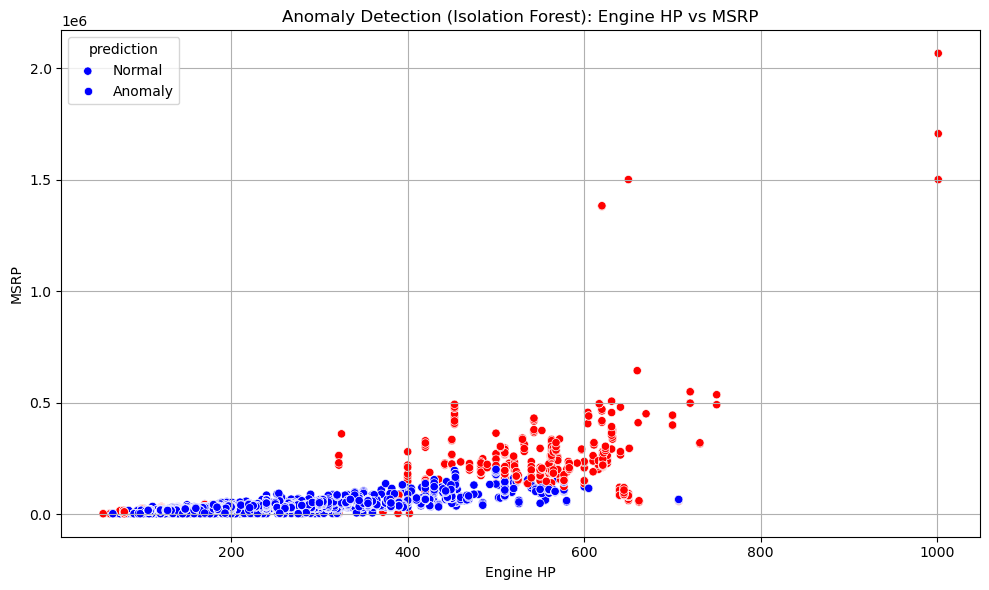

In [ ]:
# Visualize Anomalies
#********************
plt.figure(figsize=(10,6))
sns.scatterplot(
    x = df_clean['Engine HP'],
    y = df_clean['MSRP'],
    hue = df_clean['pred_label'],
    palette = ['blue','red']
)
plt.title("Anomaly Detection (Isolation Forest): Engine HP vs MSRP")
plt.xlabel("Engine HP")
plt.ylabel("MSRP")
plt.legend(title = "prediction",labels = ["Normal","Anomaly"])
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Save the models (.pkl)
#######################
dump(iso_model,'isolation_forest_model.pkl')
print("Model saved as isolation_forest_model.pkl")

Model saved as isolation_forest_model.pkl


In [ ]:
#Save CSV results

In [ ]:
df_clean.to_csv("anomaly_detection_output.csv",index = False)
print("Labeled data saved to anomaly_detection_output.csv")

Labeled data saved to anomaly_detection_output.csv


In [ ]:
print("Now Anomaly detection model has been completed successfully using Isolation Forest Algorithm by Yuvi")

Now Anomaly detection model has been completed successfully using Isolation Forest Algorithm by Yuvi
